1. 

En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.datasets import load_digits
digits = load_digits()


import warnings
warnings.filterwarnings('ignore')

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [21]:
X = digits['data']
y = digits['target']

print("TAMANO ORIGINAL X:", X.shape)
print("TAMANO ORIGINAL y:", y.shape)

X = X[np.where((y==1)|(y==9))[0], :]
y = y[(y==1)|(y==9)]

print("\n")

print("TAMANO FILTRADO X:", X.shape)
print("TAMANO FILTRADO y:", y.shape)

TAMANO ORIGINAL X: (1797, 64)
TAMANO ORIGINAL y: (1797,)


TAMANO FILTRADO X: (362, 64)
TAMANO FILTRADO y: (362,)


In [35]:
df_X = pd.DataFrame(X)
df_X.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
229,0.0,0.0,3.0,16.0,12.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,14.0,16.0,3.0,0.0,0.0
139,0.0,0.0,1.0,10.0,15.0,11.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,12.0,16.0,2.0,0.0,0.0
34,0.0,0.0,6.0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,5.0,16.0,14.0,9.0,4.0,0.0
293,0.0,0.0,0.0,0.0,7.0,16.0,6.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,6.0,0.0
257,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,0.0,2.0,...,6.0,0.0,0.0,0.0,9.0,16.0,16.0,11.0,1.0,0.0
175,0.0,0.0,4.0,14.0,11.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,15.0,14.0,4.0,0.0,0.0
74,0.0,0.0,0.0,5.0,13.0,16.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,10.0,0.0,0.0,0.0
313,0.0,0.0,0.0,7.0,16.0,16.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,3.0,0.0,0.0,0.0
124,0.0,0.0,2.0,11.0,13.0,4.0,0.0,0.0,0.0,1.0,...,7.0,0.0,0.0,0.0,4.0,10.0,15.0,15.0,3.0,0.0
286,0.0,0.0,0.0,0.0,9.0,15.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0,3.0,0.0


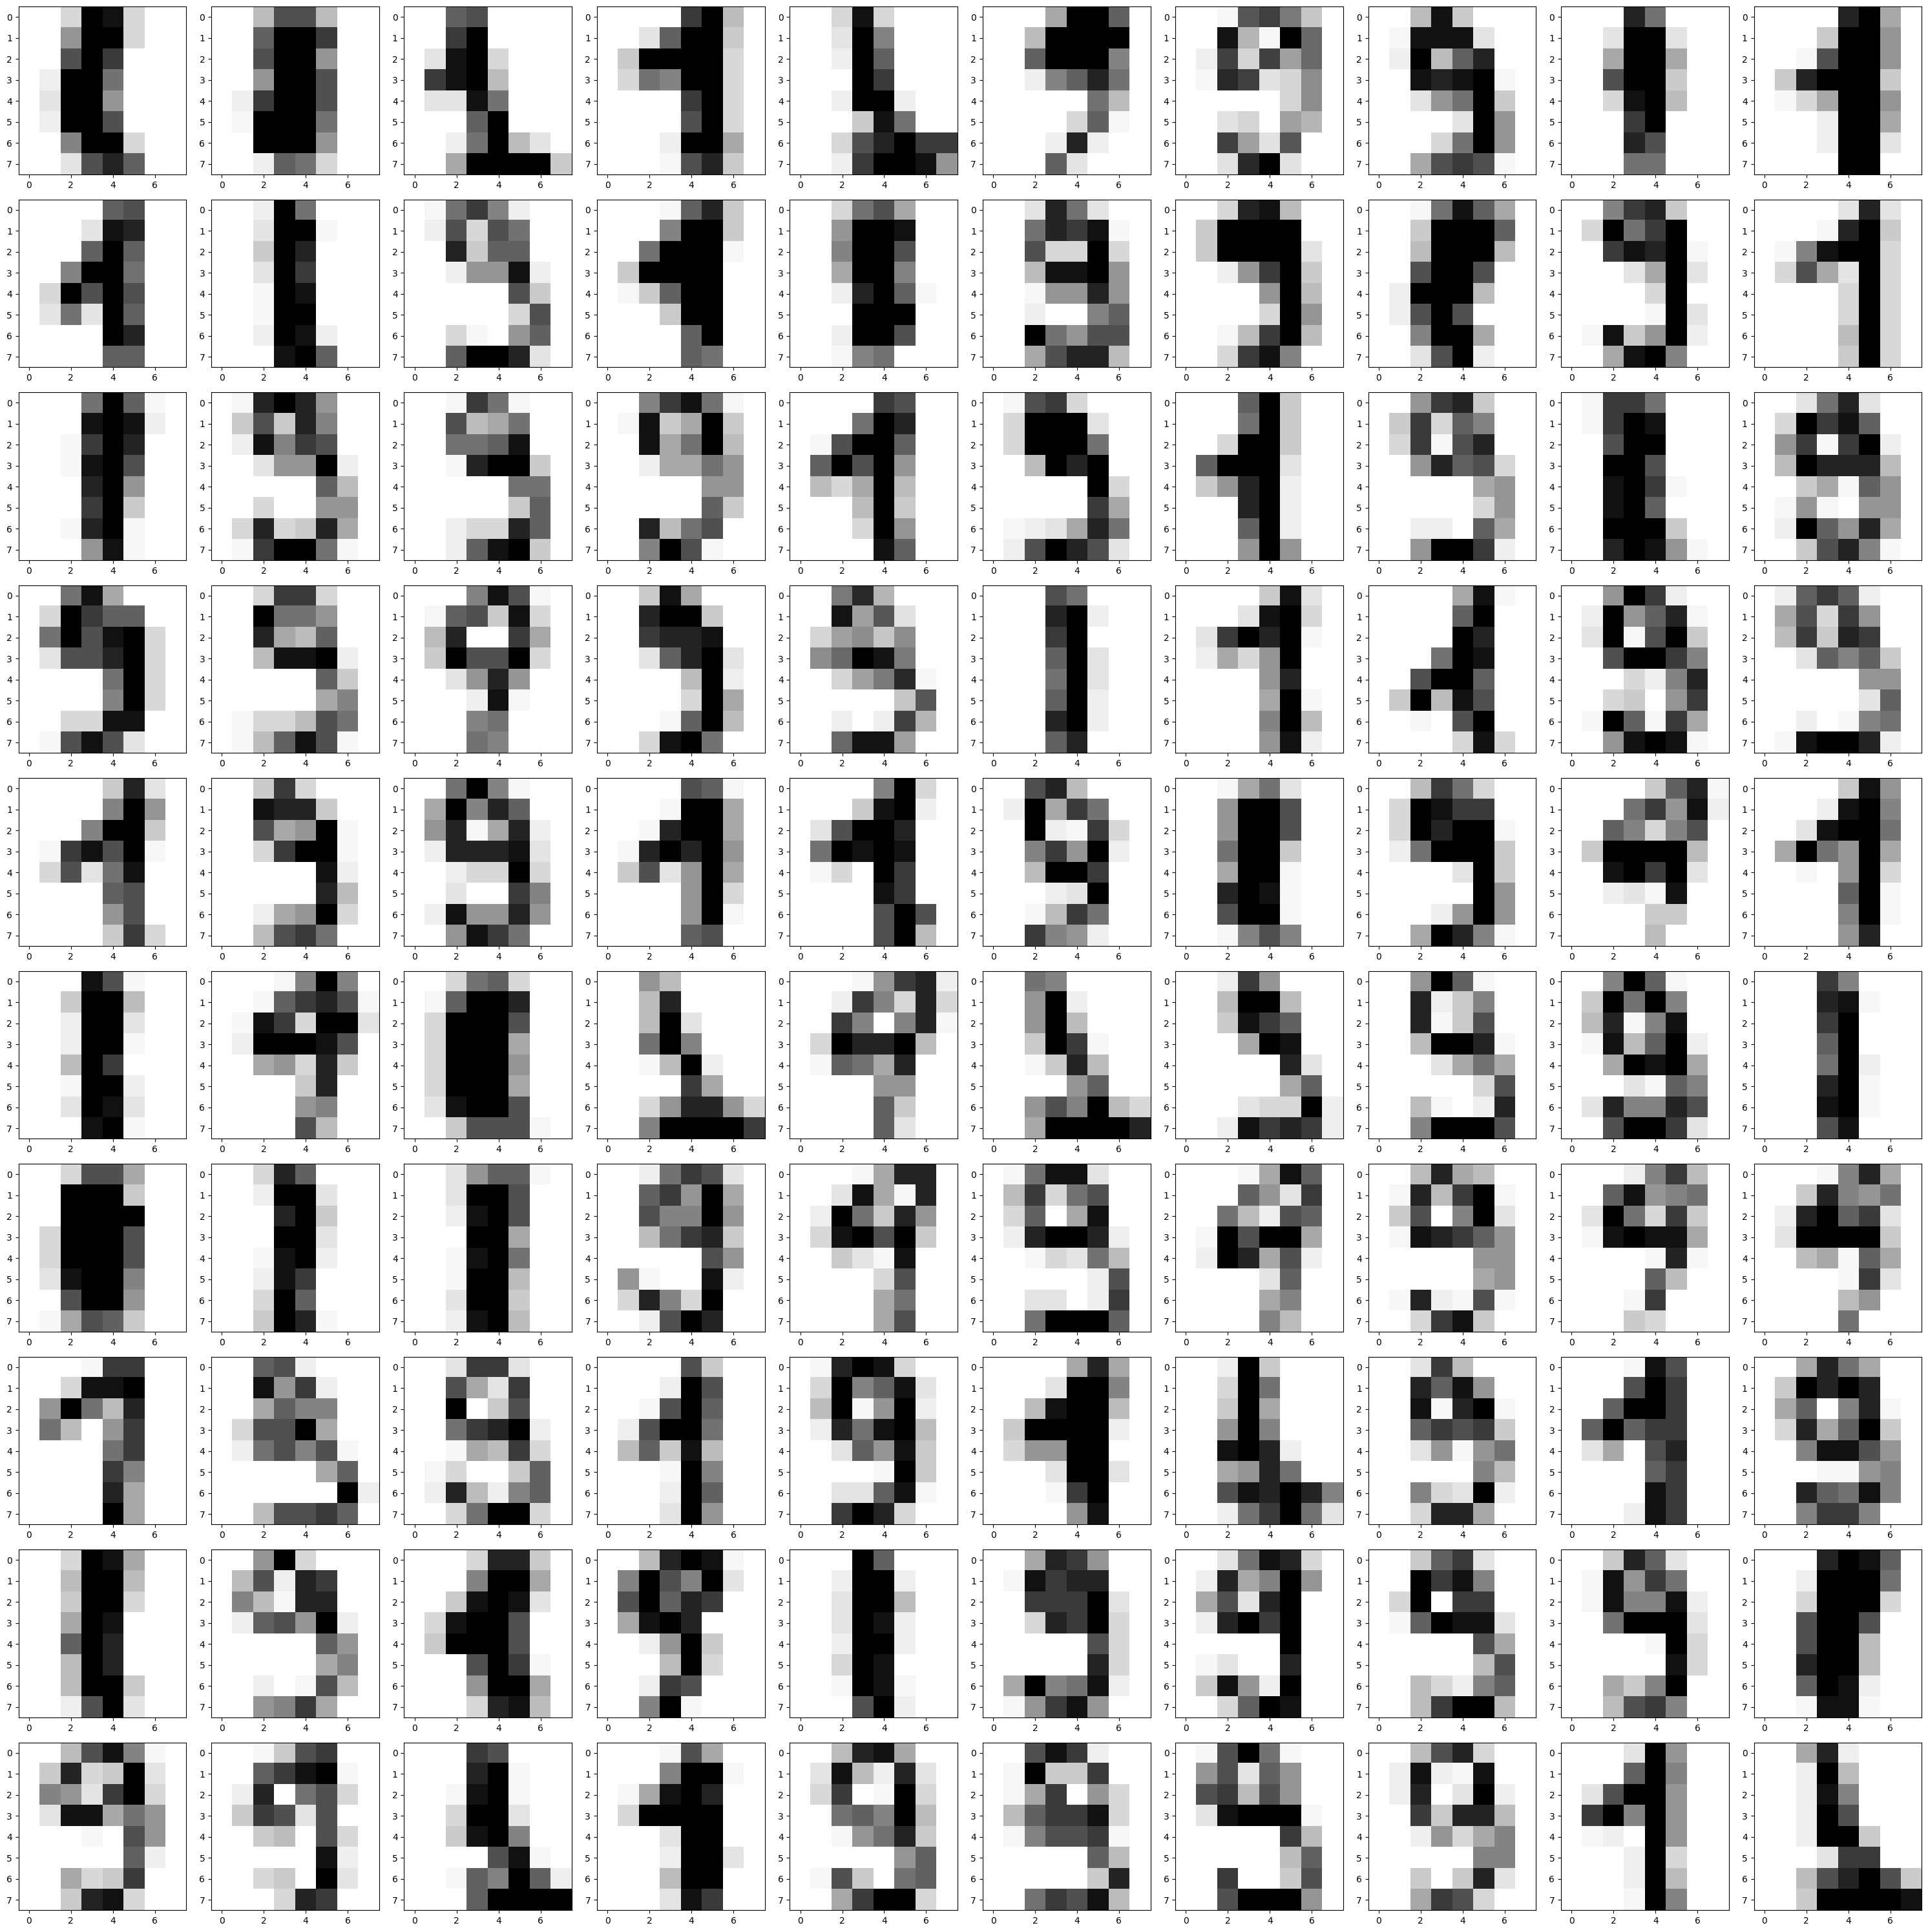

In [42]:
fig, ax = plt.subplots(10, 10, figsize=(30, 30))

imgs = df_X.sample(100)

for i, axx in enumerate(ax.reshape(-1)):
    axx.imshow(imgs.iloc[i, :].values.reshape(8, 8), cmap='Greys')

plt.tight_layout()

# Train Model

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.5, random_state=0)

In [77]:
print("TRAIN SIZE", X_train.shape, '-', y_train.shape)
print("TEST SIZE", X_test.shape, '-', y_test.shape)

TRAIN SIZE (181, 64) - (181,)
TEST SIZE (181, 64) - (181,)


In [78]:
max_train = X_train.max()
min_train = X_train.min()

X_train_sc = (X_train - min_train) / (max_train - min_train)
X_test_sc = (X_test - min_train) / (max_train - min_train)

In [79]:
X_train_sc.min(), X_train_sc.max() 

(0.0, 1.0)

In [80]:
X_test_sc.min(), X_test_sc.max() 

(0.0, 1.0)

In [86]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1)

lr.fit(X_train, y_train)

LogisticRegression(C=1)

In [87]:
y_hat = lr.predict(X_test)

In [88]:
y_hat

array([9, 1, 1, 1, 1, 9, 9, 9, 1, 9, 1, 1, 1, 1, 1, 9, 1, 9, 1, 9, 9, 9,
       9, 9, 9, 1, 1, 9, 1, 1, 9, 9, 1, 1, 9, 9, 9, 9, 1, 9, 1, 1, 1, 9,
       1, 1, 9, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9, 1, 9, 1, 9, 1, 9, 9, 9,
       1, 9, 9, 9, 9, 1, 1, 9, 9, 1, 1, 9, 1, 9, 9, 1, 9, 1, 1, 1, 1, 9,
       9, 1, 9, 1, 1, 9, 1, 1, 9, 9, 9, 9, 1, 9, 1, 1, 1, 1, 9, 9, 1, 9,
       9, 1, 9, 9, 1, 1, 1, 1, 9, 9, 9, 1, 1, 9, 9, 1, 1, 1, 1, 9, 9, 9,
       9, 1, 9, 9, 1, 9, 9, 9, 9, 1, 1, 9, 1, 9, 9, 1, 9, 9, 9, 1, 1, 9,
       9, 9, 9, 9, 1, 1, 9, 1, 9, 9, 1, 1, 9, 1, 9, 9, 1, 1, 1, 9, 1, 9,
       9, 9, 1, 1, 9])

# Evaluate Model

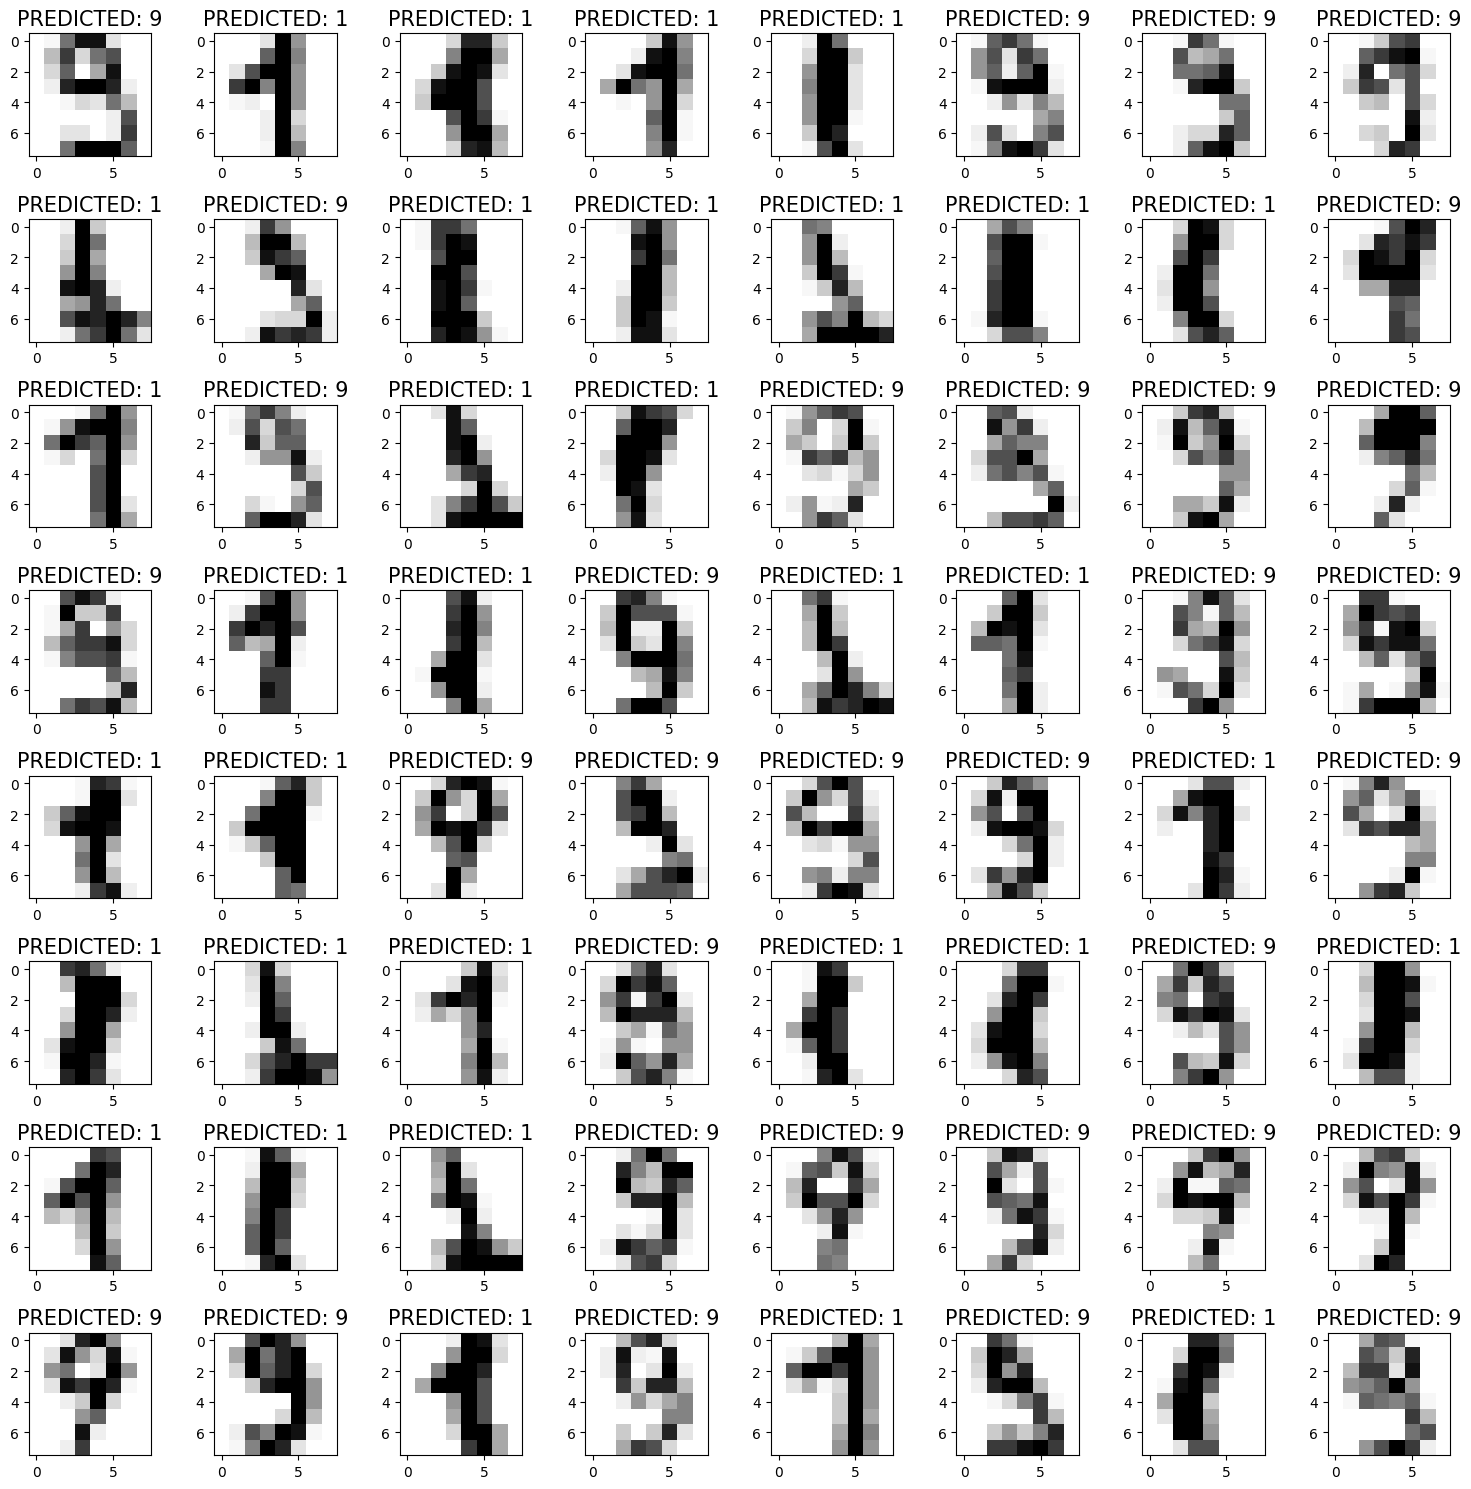

In [71]:
fig, ax = plt.subplots(8, 8, figsize=(15, 15))

imgs = X_test[:64, :]

for i, axx in enumerate(ax.reshape(-1)):
    axx.imshow(imgs[i, :].reshape(8, 8), cmap='Greys')
    axx.set_title('PREDICTED: {}'.format(y_hat[i]), fontsize=15)

plt.tight_layout()

In [89]:
acc = accuracy_score(y_test, y_hat)

print(f"ACCURACY EN TEST: {acc:.3f}")

ACCURACY EN TEST: 0.983


In [104]:
3 / 181

0.016574585635359115

In [90]:
confusion_matrix(y_true=y_test, y_pred=y_hat)

array([[84,  3],
       [ 0, 94]], dtype=int64)

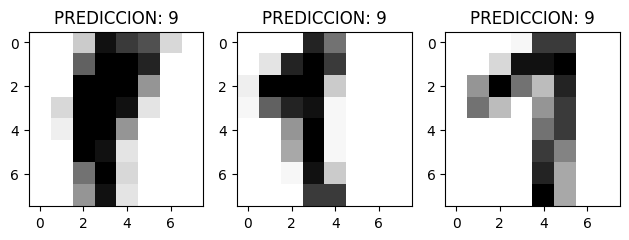

In [103]:
idx_errores = np.where(y_hat != y_test)[0]
errores = X_test[idx_errores, :]
pred_errores = y_hat[idx_errores]
fig, ax = plt.subplots(1, 3)
for i, axx in enumerate(ax.reshape(-1)):
    axx.imshow(errores[i, :].reshape(8,8), cmap='Greys')
    axx.set_title(f'PREDICCION: {pred_errores[i]}')

plt.tight_layout()